In [67]:
import pandas as pd
import numpy as np
import importlib
import util.Data as data_util
import util.DataframeProcess as df_proc
import seaborn as sn
import matplotlib.pyplot as plt

In [68]:
importlib.reload(data_util)
importlib.reload(df_proc)

<module 'util.DataframeProcess' from 'D:\\scul\\uaic-ub\\licenta\\code\\util\\DataframeProcess.py'>

# Data

In [69]:
csv_filename = r'../data_db/final_coordinates-conversion-v2.csv'
df_main = data_util.import_data(csv_filename)

In [70]:
df_data = df_main.copy()
df_data.shape

(1827, 26)

In [71]:
df_data['title'].unique().size

61

## Split wm and rest

In [72]:
df_data = df_main.copy()
mask_wm = df_data['keywords'].str.contains('working memory')

### Working Memory

In [73]:
df_wm = df_data[mask_wm]

In [74]:
df_wm['title'].unique().size

17

In [75]:
df_wm_proc = df_proc.df_process(df_wm)
df_wm_proc.head(1)

,title,author,Number of Foci,Number of Subjects,contrast_set,keywords_split
0,A Rapid fMRI Task Battery for Mappin...,Drobyshevsky et al,13,31,{2-back > 0-back},"{fMRI, working memory, talairach, tw..."


### Contrast wm

In [76]:
list_contrast_wm = list(df_proc.list_of_sets_to_set(df_wm_proc, 'contrast_set'))
counter_contrast_wm = data_util.df_counter(df=df_wm_proc.explode('contrast_set'), column='contrast_set',
                                           set_keywords=list_contrast_wm, order=1)
counter_contrast_wm

{'>nan_values<': 0,
 '1-back > rest': 1,
 '2-back > 1-back': 1,
 'precue > retrocue': 1,
 'retrocue and precue': 1,
 'sub-dif > baseline': 1,
 'sub-dif > frame-dif': 1,
 'sub-id > baseline': 1,
 'retrocue > precue': 1,
 '1-back > 2-back': 1,
 'n-back > control task': 1,
 '-': 2,
 '3-back > 2-back > 1-back > 0-back': 2,
 '3-back > 0-back': 2,
 '2-back > 1-back > 0-back': 2,
 '2-back > 0-back': 6}

In [77]:
# chosen set of contrast
min_val = 1
list_contrast_selection_wm = list(set([key for key in list_contrast_wm if counter_contrast_wm[key] >= min_val]))
# create new col with only selected contrasts
df_wm_proc['selected_contrast'] = df_wm_proc['contrast_set'].apply(
    lambda x: set(x).intersection(list_contrast_selection_wm))

contrast_bool_wm = df_proc.boolean_df(df_wm_proc['selected_contrast'], list_contrast_selection_wm)
contrast_int_wm = contrast_bool_wm.astype(int)
contrast_freq_mat_wm = np.dot(contrast_int_wm.T, contrast_int_wm)

In [78]:
contrast_freq_wm = pd.DataFrame(contrast_freq_mat_wm, columns=list_contrast_selection_wm,
                                index=list_contrast_selection_wm)
# contrast_freq_wm

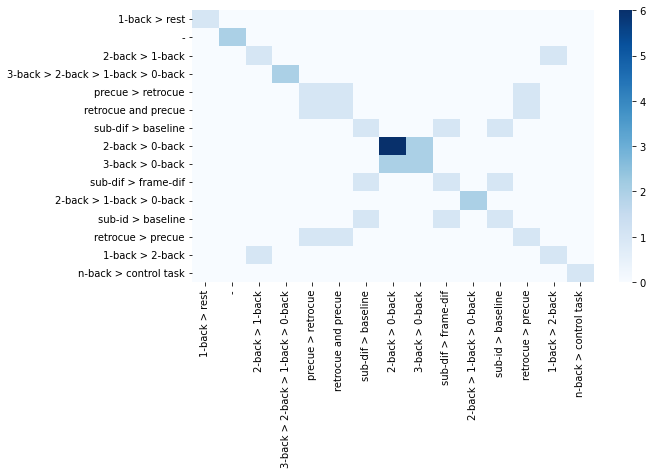

In [79]:
fig, ax = plt.subplots(figsize=(9, 5))
sn.heatmap(contrast_freq_wm, cmap="Blues")
# plt.xticks(rotation=50)
plt.savefig("heatmap_contrast_wm.png", dpi=300)

### Keywords wm

In [80]:
counter_keywords_wm = data_util.df_counter(df=df_wm_proc.explode('keywords_split'), column='keywords_split',
                                           set_keywords=df_proc.list_of_sets_to_set(df_wm_proc, 'keywords_split'),
                                           order=1)
counter_keywords_wm

{'>nan_values<': 0,
 'reversal learning task': 1,
 'visual spatial cue': 1,
 'verbal pseudo-words': 1,
 'visual identical shapes': 1,
 'experimental task': 1,
 'reward value': 1,
 'precue': 1,
 'Sub-Dif': 1,
 'visual object': 1,
 'scrambled drawings': 1,
 'verbal': 1,
 'visual faces': 1,
 'reading': 1,
 'decision phase': 1,
 'perceptual matching task': 1,
 'visual shape': 1,
 'positive reward': 1,
 'visual shape color': 1,
 'Sub-Id': 1,
 'facial expression': 1,
 'anticipation phase': 1,
 'negative reward': 1,
 'retrocue': 1,
 'two and four choice reversal learning task': 1,
 'visual word recognition': 2,
 'visual numbers': 2,
 'three-back task': 2,
 'one-back task': 2,
 'monetary reward': 2,
 'decision making': 3,
 'visual letters': 6,
 'two-back task': 7,
 'talairach': 7,
 'MNI': 10,
 'n-back task': 14,
 'fMRI': 17,
 'working memory': 17}

In [81]:
# chosen set of keywords
# list_keywords = list(df_proc.list_of_sets_to_set(df_wm_proc, 'keywords_split'))
list_keywords = [
    'Sub-Dif',
    'Sub-Id',
    'anticipation phase',
    'decision making',
    'decision phase',
    'facial expression',
    'monetary reward',
    'n-back task',
    'negative reward',
    'one-back task',
    'positive reward',
    'precue',
    'reading',
    'retrocue',
    'reward value',
    'scrambled drawings',
    'three-back task',
    'two and four choice reversal learning task',
    'two-back task',
    'verbal',
    'verbal pseudo-words',
    'visual faces',
    'visual letters',
    'visual numbers',
    'visual object',
    'visual shape',
    'visual shape color',
    'visual spatial cue',
    'visual word recognition']

In [82]:
min_val = 2
list_keywords_selection_wm = list(set([key for key in list_keywords if counter_keywords_wm[key] >= min_val]))
# create new col with only selected keywordss
df_wm_proc['selected_keywords'] = df_wm_proc['keywords_split'].apply(
    lambda x: set(x).intersection(list_keywords_selection_wm))

keywords_bool_wm = df_proc.boolean_df(df_wm_proc['selected_keywords'], list_keywords_selection_wm)
keywords_int_wm = keywords_bool_wm.astype(int)
keywords_freq_mat_wm = np.dot(keywords_int_wm.T, keywords_int_wm)

In [83]:
keywords_freq_wm = pd.DataFrame(keywords_freq_mat_wm, columns=list_keywords_selection_wm,
                                index=list_keywords_selection_wm)
# keywords_freq_wm

<AxesSubplot:>

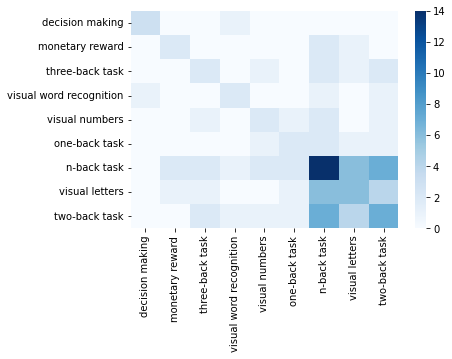

In [84]:
sn.heatmap(keywords_freq_wm, cmap="Blues")

### Keywords and Contrast wm

In [85]:
list_cnt_key_selection_wm = list_contrast_selection_wm + list_keywords_selection_wm
cnt_key_int_wm = pd.merge(contrast_int_wm, keywords_int_wm, left_index=True, right_index=True).astype(int)
cnt_key_freq_mat_wm = np.dot(cnt_key_int_wm.T, cnt_key_int_wm)

In [86]:
cnt_key_freq_wm = pd.DataFrame(cnt_key_freq_mat_wm, columns=list_cnt_key_selection_wm, index=list_cnt_key_selection_wm)

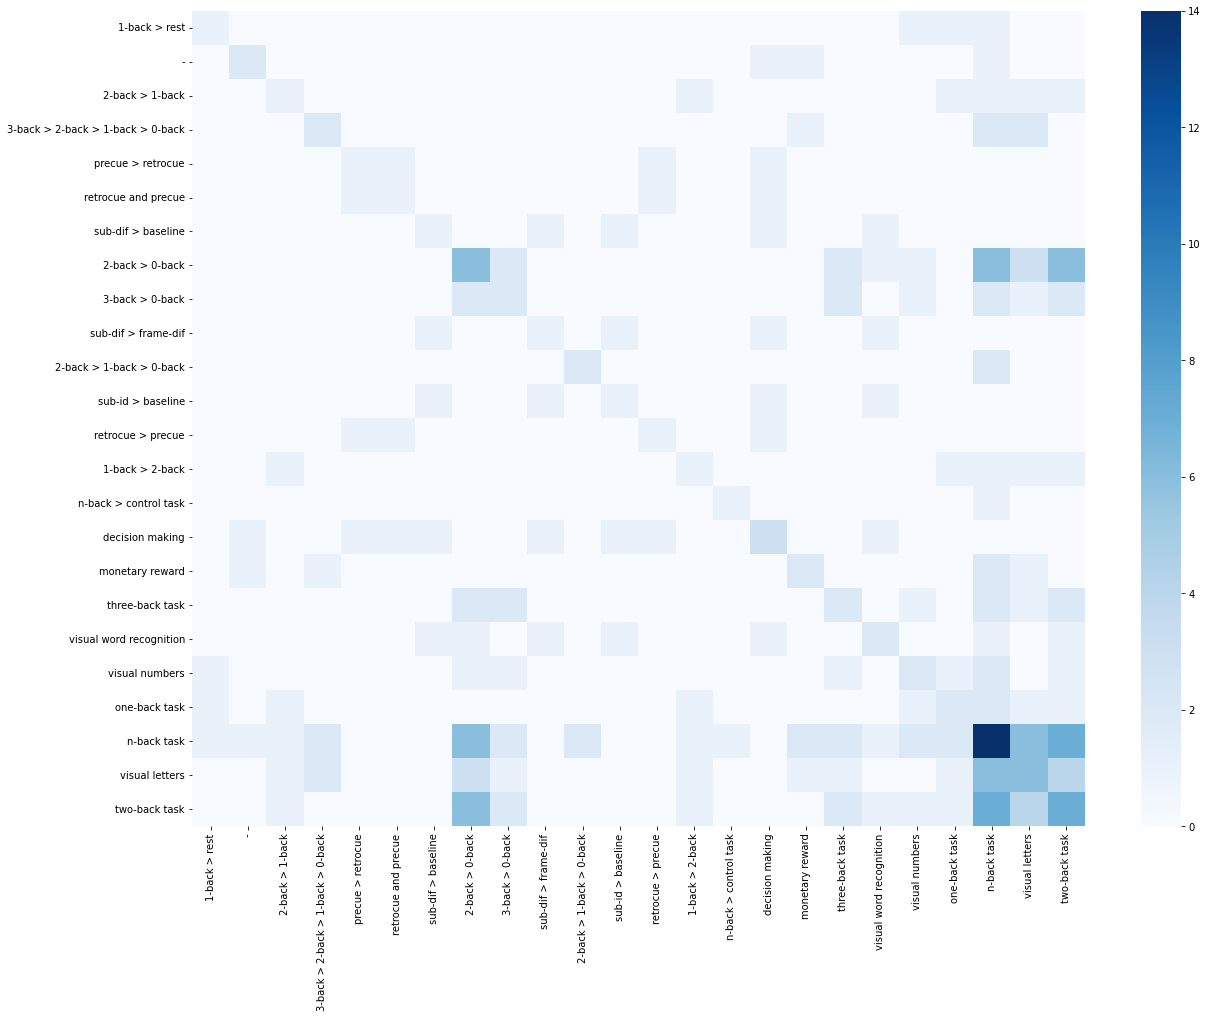

In [87]:
fig, ax = plt.subplots(figsize=(20, 15))
sn.heatmap(cnt_key_freq_wm, cmap="Blues")
# plt.xticks(rotation=60)
plt.savefig("heatmap_cnt_key_wm.png", dpi=300)

## Reward magnitude and type

In [88]:
df_reward = df_data[~mask_wm]

In [89]:
df_reward['title'].unique().size

46

In [90]:
df_reward_proc = df_proc.df_process(df_reward)
df_reward_proc.head(1)

,title,author,Number of Foci,Number of Subjects,contrast_set,keywords_split
0,A functional neuroimaging study of m...,Taylor et al,18,12,{-},"{fMRI, monetary reward, decision pha..."


### Contrast reward

In [91]:
list_contrast_reward = list(df_proc.list_of_sets_to_set(df_reward_proc, 'contrast_set'))
counter_contrast_reward = data_util.df_counter(df=df_reward_proc.explode('contrast_set'), column='contrast_set',
                                           set_keywords=list_contrast_reward, order=1)
counter_contrast_reward

{'>nan_values<': 0,
 'movement > no movement and reward > no reward': 1,
 'small incentives > baseline': 1,
 'ar switch > stay and sr switch > stay': 1,
 'expected reward > received reward and control > adhd': 1,
 'l4 > l1': 1,
 'loss after winning streak > l1': 1,
 'win after losing streak > w1': 1,
 'w1 > l1': 1,
 'large incentives > baseline': 1,
 'win > lose and risk > safe': 1,
 'disadvantageous > advantageous': 1,
 'monetary reward > erotic reward': 1,
 'erotic reward > monetary reward': 1,
 'social reward > monetary reward': 1,
 'response maintenance > response switch': 1,
 'win modulation': 1,
 'punishment > reward': 1,
 'risky gambles > safe gambles': 1,
 'all w > all l': 1,
 'lose modulation': 1,
 'social reward magnitude': 1,
 'low-calorie and high-calorie': 1,
 'beautiful faces > average faces': 1,
 'reward > punishment': 1,
 'lose > win': 1,
 'cash-out > control': 1,
 'pumps > control': 1,
 'inhibiton task > control task': 1,
 'monetary reward > faces reward': 1,
 'decisio

### Keywords reward

In [92]:
counter_keywords_reward = data_util.df_counter(df=df_reward_proc.explode('keywords_split'), column='keywords_split',
                                           set_keywords=df_proc.list_of_sets_to_set(df_reward_proc, 'keywords_split'),
                                           order=1)
counter_keywords_reward

{'>nan_values<': 0,
 'potential gain': 1,
 'dopamine': 1,
 'cups task': 1,
 'safe choice': 1,
 'negative expectancy': 1,
 'increasing activation': 1,
 'small incentive': 1,
 'decreasing activation': 1,
 'movement': 1,
 'high vs low calorie food': 1,
 'modelling prediction error': 1,
 'verbal reward': 1,
 'erotic reward': 1,
 'reinforcement learning': 1,
 'young': 1,
 'high incentive': 1,
 'visual shape color': 1,
 'visual color pies with probabilities': 1,
 'inhibition': 1,
 'anova': 1,
 'adult': 1,
 'time conditioning': 1,
 'high calorie': 1,
 'conditioning task': 1,
 'extraversion': 1,
 'effect of reward': 1,
 'potential loss': 1,
 'chocolate bars': 1,
 'response maintenance': 1,
 'monetary and erotic reward': 1,
 'response switching': 1,
 'probability': 1,
 'fractal image': 1,
 'visual cue': 1,
 'visual shape': 1,
 'increasing reward magnitude': 1,
 'increasing reward uncertainty': 1,
 'low calorie': 1,
 'time effect': 1,
 'positive expectancy': 1,
 'Stroop task': 1,
 'feedback rewa

### Obtain reduce list of keywords - rewards type

In [93]:
set_keywords_reward_type = set([el for el in df_proc.list_of_sets_to_set(df_reward_proc, 'keywords_split') if el.find('reward') != -1])
counter_keywords_reward_type = data_util.df_counter(df=df_reward_proc.explode('keywords_split'), column='keywords_split',
                                           set_keywords=set_keywords_reward_type,
                                           order=1)
counter_keywords_reward_type

{'>nan_values<': 0,
 'effect of reward': 1,
 'monetary and erotic reward': 1,
 'increasing reward magnitude': 1,
 'increasing reward uncertainty': 1,
 'verbal reward': 1,
 'erotic reward': 1,
 'feedback reward': 1,
 'taste reward': 2,
 'context-dependent reward': 3,
 'negative reward': 5,
 'social reward': 7,
 'positive reward': 11,
 'reward magnitude': 16,
 'reward value': 18,
 'monetary reward': 36}

### Obtain reduce list of keywords - Reward contigency

In [94]:
set_keywords = df_proc.list_of_sets_to_set(df_reward_proc, 'keywords_split').difference(set_keywords_reward_type)
set_keywords

{'Balloon Analog Risk Task',
 'MID',
 'MNI',
 'SID',
 'Stroop task',
 'adult',
 'anova',
 'anticipation phase',
 'chocolate bars',
 'conditioning task',
 'cups task',
 'decision making',
 'decision phase',
 'decreasing activation',
 'dopamine',
 'extraversion',
 'fMRI',
 'face stimuli',
 'food',
 'fractal image',
 'gambling',
 'high calorie',
 'high gain vs high loss',
 'high incentive',
 'high vs low calorie food',
 'increasing activation',
 'inhibition',
 'low calorie',
 'modelling prediction error',
 'movement',
 'n-back task',
 'negative expectancy',
 'outcome phase',
 'passive',
 'performance-dependent',
 'positive expectancy',
 'potential gain',
 'potential loss',
 'probability',
 'reinforcement learning',
 'response maintenance',
 'response switching',
 'reversal learning',
 'risk choice',
 'safe choice',
 'small incentive',
 'talairach',
 'task switching',
 'time conditioning',
 'time effect',
 'viewing',
 'visual cards',
 'visual color pies with probabilities',
 'visual cue',


### Check elements

In [95]:
############
check_set = ['reversal learning']
pd.set_option('display.max_colwidth', None)  # to show all the column values
mask = df_proc.check_column_elem(df=df_reward_proc,colummn_name='keywords_split',check_set=check_set)
df_reward_proc[mask]

,title,author,Number of Foci,Number of Subjects,contrast_set,keywords_split
13,Determining a Role for Ventromedial Prefrontal Cortex in Encoding Action-Based Value Signals During Reward-Related Decision Making,Glascher et al,20,20,"{ar switch > stay and sr switch > stay, ar; sr > neutral activity}","{decision making, fMRI, fractal image, monetary reward, reinforcement learning, task switching, MNI, outcome phase, reversal learning}"
42,Role of the Medial Prefrontal Cortex in Impaired Decision Making in Juvenile Attention-Deficit-Hyperactivity Disorder,Hauser et al,12,20,{expected reward > received reward and control > adhd},"{decision making, fMRI, monetary reward, visual object, task switching, MNI, outcome phase, reversal learning}"


In [96]:
pd.set_option('display.max_colwidth', 40)
#############

